In [1]:
!git clone https://github.com/fizyr/keras-retinanet.git

fatal: destination path 'keras-retinanet' already exists and is not an empty directory.


In [2]:
%cd keras-retinanet
!pip install .

/content/keras-retinanet
Processing /content/keras-retinanet
  Created wheel for keras-retinanet: filename=keras_retinanet-0.5.1-cp36-cp36m-linux_x86_64.whl size=169694 sha256=c2d7b861dd3952243d6d892a6202ed634b7650be0b013b6c4f671d6d4557949a
  Stored in directory: /root/.cache/pip/wheels/b2/9f/57/cb0305f6f5a41fc3c11ad67b8cedfbe9127775b563337827ba
Successfully built keras-retinanet
  Found existing installation: keras-retinanet 0.5.1
    Uninstalling keras-retinanet-0.5.1:
      Successfully uninstalled keras-retinanet-0.5.1


In [3]:
!python setup.py build_ext --inplace
%cd ../

running build_ext
skipping 'keras_retinanet/utils/compute_overlap.c' Cython extension (up-to-date)
copying build/lib.linux-x86_64-3.6/keras_retinanet/utils/compute_overlap.cpython-36m-x86_64-linux-gnu.so -> keras_retinanet/utils
/content


In [4]:
!unzip day4.zip

Archive:  day4.zip
  inflating: custom_datasets/117563_46933_3525.jpg  
  inflating: custom_datasets/117563_46933_3525.xml  
  inflating: custom_datasets/14950_27086_229.jpg  
  inflating: custom_datasets/14950_27086_229.xml  
  inflating: custom_datasets/19445_26923_2542.jpg  
  inflating: custom_datasets/19445_26923_2542.xml  
  inflating: custom_datasets/201503230930031243.jpg  
  inflating: custom_datasets/201503230930031243.xml  
  inflating: custom_datasets/2018102100594_0.jpg  
  inflating: custom_datasets/2018102100594_0.xml  
  inflating: custom_datasets/28083_13903_1024.jpg  
  inflating: custom_datasets/28083_13903_1024.xml  
 extracting: custom_datasets/5bcc1301240000a7025795d1.jpeg  
  inflating: custom_datasets/5bcc1301240000a7025795d1.xml  
  inflating: custom_datasets/PGT20170730079501003_P2.jpg  
  inflating: custom_datasets/PGT20170730079501003_P2.xml  
  inflating: custom_datasets/el-clasico_zocufc3jvere1ljscz25af8na.jpg  
  inflating: custom_datasets/el-clasico_zocu

In [19]:
!python keras-retinanet/keras_retinanet/bin/train.py --step 15 --epochs 20 csv annotation.csv classnames.txt

Using TensorFlow backend.
2020-06-25 08:52:46.902029: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcudart.so.10.1
102948864/102945312 [==============================] - 9s 0us/step
Creating model, this may take a second...
2020-06-25 08:52:58.700016: I tensorflow/stream_executor/platform/default/dso_loader.cc:44] Successfully opened dynamic library libcuda.so.1
2020-06-25 08:52:58.754991: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2020-06-25 08:52:58.755585: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1561] Found device 0 with properties: 
pciBusID: 0000:00:04.0 name: Tesla P4 computeCapability: 6.1
coreClock: 1.1135GHz coreCount: 20 deviceMemorySize: 7.43GiB deviceMemoryBandwidth: 178.99GiB/s
2020-06-25 08:52:58.755625: I tensorflow/stream_executor/platform/default/dso_loade

In [29]:
os.listdir('snapshots')

['resnet50_csv_01.h5',
 'resnet50_csv_11.h5',
 'resnet50_csv_09.h5',
 'resnet50_csv_04.h5',
 'resnet50_csv_14.h5',
 'resnet50_csv_18.h5',
 'resnet50_csv_07.h5',
 'resnet50_csv_02.h5',
 'resnet50_csv_20.h5',
 'resnet50_csv_17.h5',
 'resnet50_csv_15.h5',
 'resnet50_csv_06.h5',
 'resnet50_csv_08.h5',
 'resnet50_csv_10.h5',
 'resnet50_csv_19.h5',
 'resnet50_csv_13.h5',
 'resnet50_csv_16.h5',
 'resnet50_csv_05.h5',
 'resnet50_csv_12.h5',
 'resnet50_csv_03.h5']

In [33]:
import os
from glob import glob
from PIL import Image
snapshot_list = glob('snapshots/*.h5')
snapshot_list.sort()
snapshot_list

['snapshots/resnet50_csv_01.h5',
 'snapshots/resnet50_csv_02.h5',
 'snapshots/resnet50_csv_03.h5',
 'snapshots/resnet50_csv_04.h5',
 'snapshots/resnet50_csv_05.h5',
 'snapshots/resnet50_csv_06.h5',
 'snapshots/resnet50_csv_07.h5',
 'snapshots/resnet50_csv_08.h5',
 'snapshots/resnet50_csv_09.h5',
 'snapshots/resnet50_csv_10.h5',
 'snapshots/resnet50_csv_11.h5',
 'snapshots/resnet50_csv_12.h5',
 'snapshots/resnet50_csv_13.h5',
 'snapshots/resnet50_csv_14.h5',
 'snapshots/resnet50_csv_15.h5',
 'snapshots/resnet50_csv_16.h5',
 'snapshots/resnet50_csv_17.h5',
 'snapshots/resnet50_csv_18.h5',
 'snapshots/resnet50_csv_19.h5',
 'snapshots/resnet50_csv_20.h5']

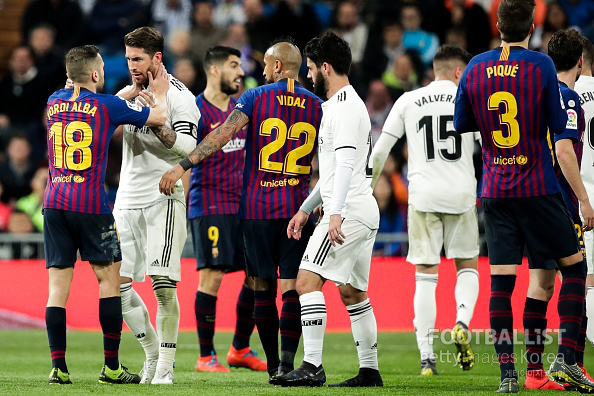

In [22]:
Image.open('custom_datasets/117563_46933_3525.jpg')

In [34]:
# show images inline
%matplotlib inline

# automatically reload modules when they have changed
%load_ext autoreload
%autoreload 2

# import keras
import keras

# import keras_retinanet
from keras_retinanet import models
from keras_retinanet.utils.image import read_image_bgr, preprocess_image, resize_image
from keras_retinanet.utils.visualization import draw_box, draw_caption
from keras_retinanet.utils.colors import label_color
from keras_retinanet.utils.gpu import setup_gpu

# import miscellaneous modules
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np
import time

# use this to change which GPU to use
gpu = 0

# set the modified tf session as backend in keras
setup_gpu(gpu)

Using TensorFlow backend.


1 Physical GPUs, 1 Logical GPUs


In [44]:
# adjust this to point to your downloaded/trained model
# models can be downloaded here: https://github.com/fizyr/keras-retinanet/releases
model_path = os.path.join(snapshot_list[-1])
print(model_path)
# load retinanet model
model = models.load_model(model_path, backbone_name='resnet50')

# if the model is not converted to an inference model, use the line below
# see: https://github.com/fizyr/keras-retinanet#converting-a-training-model-to-inference-model
model = models.convert_model(model)

#print(model.summary())

# load label to names mapping for visualization purposes
labels_to_names = {0: 'barcelona', 1 :'realmadrid'}

snapshots/resnet50_csv_20.h5
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-22.627417, -11.313708,  22.627417,  11.313708],
       [-28.50876 , -14.25438 ,  28.50876 ,  14.25438 ],
       [-35.918785, -17.959393,  35.918785,  17.959393],
       [-16.      , -16.      ,  16.      ,  16.      ],
       [-20.158737, -20.158737,  20.158737,  20.158737],
       [-25.398417, -25.398417,  25.398417,  25.398417],
       [-11.313708, -22.627417,  11.313708,  22.627417],
       [-14.25438 , -28.50876 ,  14.25438 ,  28.50876 ],
       [-17.959393, -35.918785,  17.959393,  35.918785]], dtype=float32)> anchors
tracking <tf.Variable 'Variable:0' shape=(9, 4) dtype=float32, numpy=
array([[-45.254833, -22.627417,  45.254833,  22.627417],
       [-57.01752 , -28.50876 ,  57.01752 ,  28.50876 ],
       [-71.83757 , -35.918785,  71.83757 ,  35.918785],
       [-32.      , -32.      ,  32.      ,  32.      ],
       [-40.317474, -40.317474,  40.317474,  40.317474],
       [

processing time:  0.1548480987548828


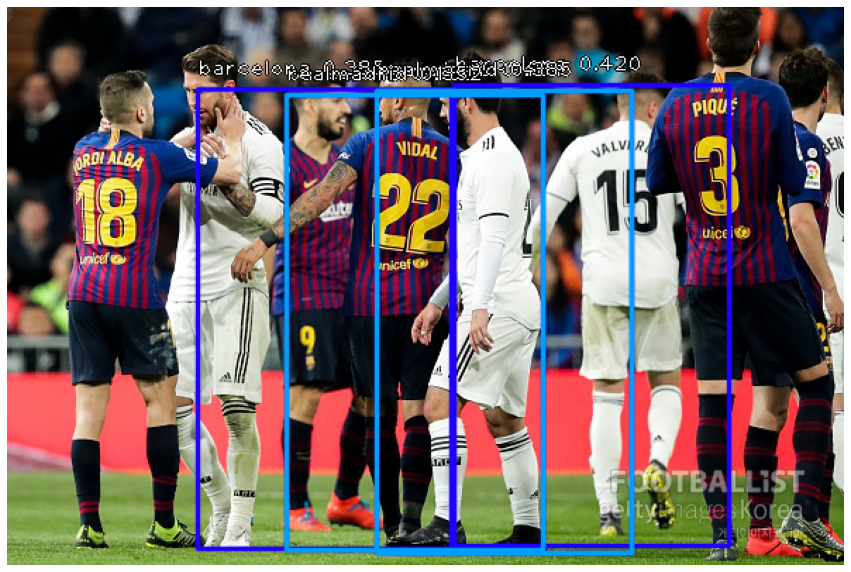

In [48]:

# load image
image = read_image_bgr('custom_datasets/117563_46933_3525.jpg')

# copy to draw on
draw = image.copy()
draw = cv2.cvtColor(draw, cv2.COLOR_BGR2RGB)

# preprocess image for network
image = preprocess_image(image)
image, scale = resize_image(image)

# process image
start = time.time()
boxes, scores, labels = model.predict_on_batch(np.expand_dims(image, axis=0))
print("processing time: ", time.time() - start)

# correct for image scale
boxes /= scale

# visualize detections
for box, score, label in zip(boxes[0], scores[0], labels[0]):
    # scores are sorted so we can break
    if score < 0.35:
        break
        
    color = label_color(label)
    
    b = box.astype(int)
    draw_box(draw, b, color=color)
    
    caption = "{} {:.3f}".format(labels_to_names[label], score)
    draw_caption(draw, b, caption)
    
plt.figure(figsize=(15, 15))
plt.axis('off')
plt.imshow(draw)
plt.show()